In [1]:
import pandas as pd

df = pd.read_csv('data/LAX_weather.csv')

# Drop columns for snow depth (SNWD), wind (AWND,WDF2,WDF5,WSF2,WSF5), and weather type (WT01,WT02,WT08)
df = df.drop(['SNWD','AWND','WDF2','WDF5','WSF2','WSF5','WT01','WT02','WT08'],axis=1)
df['DATE']=pd.to_datetime(df['DATE'])
df.head()

,STATION,NAME,DATE,PRCP,SNOW,TAVG,TMAX,TMIN
0,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",2020-05-01,0.0,0.0,65,72,62
1,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",2020-05-02,0.0,0.0,67,73,61
2,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",2020-05-03,0.0,0.0,66,72,59
3,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",2020-05-04,0.0,0.0,66,74,59
4,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",2020-05-05,0.0,0.0,70,80,63


Data documentation is available here: https://www1.ncdc.noaa.gov/pub/data/cdo/documentation/GHCND_documentation.pdf

In [2]:
# Let's make use of the experimental attibute on DataFrame 'attrs' to store some user data.
df.attrs['StationName']=df['NAME'][0]

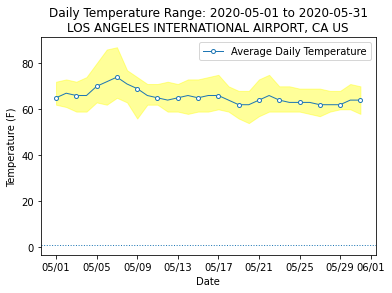

In [3]:
import matplotlib.pyplot as plt
from matplotlib import dates

fig,ax = plt.subplots()
ax.plot(df['DATE'],df['TAVG'],marker='o',markersize=4,markerfacecolor='w',lw=1,markevery=2,label='Average Daily Temperature')
ax.fill_between(df['DATE'],df['TMIN'],df['TMAX'],alpha=.4,color='yellow')
ax.axhline(1.0, linestyle=':', lw=1)
title_str = 'Daily Temperature Range: {start} to {end}\n{station_name}'.format(
    start=df['DATE'].iloc[0].strftime('%Y-%m-%d'),
    end=df['DATE'].iloc[-1].strftime('%Y-%m-%d'),
    station_name=(df.attrs['StationName']))
ax.set_title(title_str)
ax.xaxis.set_major_formatter(dates.DateFormatter('%m/%d'))
ax.set_ylabel('Temperature (F)')
ax.set_xlabel('Date')
ax.legend()
    

In [5]:
@pd.api.extensions.register_dataframe_accessor("weather")
class WeatherAccessor:
    def __init__(self, pandas_obj):
        self._validate(pandas_obj)
        self._obj=pandas_obj
        
    @staticmethod
    def _validate(obj):
        # verify are columns for date, tmin, tmax, and tavg
        if not all(col in obj.columns for col in ['DATE','TMAX','TMIN','TAVG']):
            raise AttributeError("Columns must include 'DATE','TMAX','TMIN', and 'TAVG'")
        if not all(nm == obj['NAME'][0] for nm in obj['NAME']):
            raise AttributeError("All values in NAME column must be the same")
  
    @property
    def start_date(self):
        # return the time series start date
        return pd.to_datetime(self._obj.sort_values('DATE',axis=0)['DATE'].iloc[0]).strftime('%Y-%m-%d')
    
    @property
    def end_date(self):
        # return the time series start date
        return pd.to_datetime(self._obj.sort_values('DATE',axis=0)['DATE'].iloc[-1]).strftime('%Y-%m-%d')
  
    @property
    def station_name(self):
        # return the time series start date
        return self._obj['NAME'][0]
    
    def plot_temperature(self):
        fig,ax = plt.subplots()
        ax.plot(pd.to_datetime(self._obj['DATE']),self._obj['TAVG'],marker='o',markersize=4,markerfacecolor='w',lw=1,markevery=2,label='Average Daily Temperature')
        ax.fill_between(pd.to_datetime(self._obj['DATE']),self._obj['TMIN'],self._obj['TMAX'],alpha=.4,color='yellow')
        ax.axhline(1.0, linestyle=':', lw=1)
        title_str = 'Daily Temperature Range: {start} to {end}\n{station_name}'.format(
            start=self.start_date,
            end=self.end_date,
            station_name=self.station_name)
        ax.set_title(title_str)
        ax.xaxis.set_major_formatter(dates.DateFormatter('%m/%d'))
        ax.set_ylabel('Temperature (F)')
        ax.set_xlabel('Date')
        ax.legend()
    

In [6]:
df.weather.start_date

'2020-05-01'

In [7]:
df.weather.end_date

'2020-05-31'

And now, for convenience, we can also define a new namespaced attribute "station_name".  This avoids our need to use experimental features in pandas.

In [8]:
df.weather.station_name

'LOS ANGELES INTERNATIONAL AIRPORT, CA US'

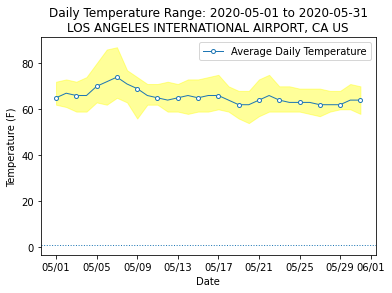

In [9]:
df.weather.plot_temperature()

In [10]:
lga_df = pd.read_csv('data/LGA_weather.csv')


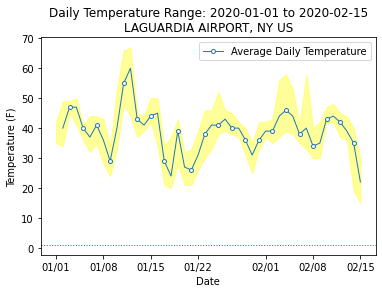

In [11]:
lga_df.weather.plot_temperature()